Криптоанализ шифра простой замены.
Самая первая идея, которая приходит в голову, если появляется потребность декодировать шифротекст, не имея ключа - это подобрать все возможные варианты перестановок. Такой способ может оказаться полезным, однако нужно понимать, что количество разных перестановок равняется m!, где m - мощность алфавита.

Почти во всех современных языках более 25 букв (в английском 26, в русском 33), в таком случае количество возможных перестановок будет равняться 26! и 33! соответственно (и это без учета специальных знаков). Вычислительная сложность данного подхода не позволяет применять его на практике. Однако, это не значит, что шифр надежен

Уязвимость данного шифра заключается в частоте встречаемых букв в алфавите. Действительно, в любой книге или статье буква "а" встречается явно чаще, чем "ъ". При шифровании данным способом, частота встречаемости символа в исходном тексте перейдет в шифротекст. Таким способом можно легко определить исходную перестановку. Давайте убедимся в этом.

Я взял текст романа "Война и мир" (французский текст был переведен на русский), убрал оттуда все латинские символы. Давайте проверим, какие символы в данном тексте встречаются чаще всего, а какие реже


In [10]:
import re
from collections import Counter
import matplotlib.pyplot as plt

In [28]:
with open('Russian_text.txt') as f:
    text = f.read().replace('\n', ' ')
text = text.lower() #Заглавные символы и строчные считаем одинаковыми
letters = re.findall(r'[а-яё]', text)
counts = Counter(letters)

total = sum(counts.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")

for char, count in counts.most_common():
    percent = (count / total) * 100
    print(f"'{char}':    {count}     {percent:.3f}%") 

Буква   Кол-во   %
'о':    170350     11.440%
'е':    122691     8.240%
'а':    122599     8.233%
'и':    98730     6.630%
'н':    97847     6.571%
'т':    86561     5.813%
'с':    78317     5.260%
'л':    75534     5.073%
'в':    67509     4.534%
'р':    66235     4.448%
'к':    51504     3.459%
'д':    45244     3.038%
'м':    44492     2.988%
'у':    41408     2.781%
'п':    38662     2.596%
'я':    33406     2.243%
'ь':    29566     1.986%
'г':    29329     1.970%
'ы':    28763     1.932%
'б':    26480     1.778%
'з':    25312     1.700%
'ч':    21693     1.457%
'й':    17263     1.159%
'ж':    15497     1.041%
'ш':    13760     0.924%
'х':    12876     0.865%
'ю':    9488     0.637%
'ц':    5328     0.358%
'э':    4762     0.320%
'щ':    4237     0.285%
'ф':    2932     0.197%
'ъ':    659     0.044%
'ё':    22     0.001%


Теперь можно сделать вывод, что буква "о" встречается чаще всего, а "ё" реже всего. Построим график для наглядности


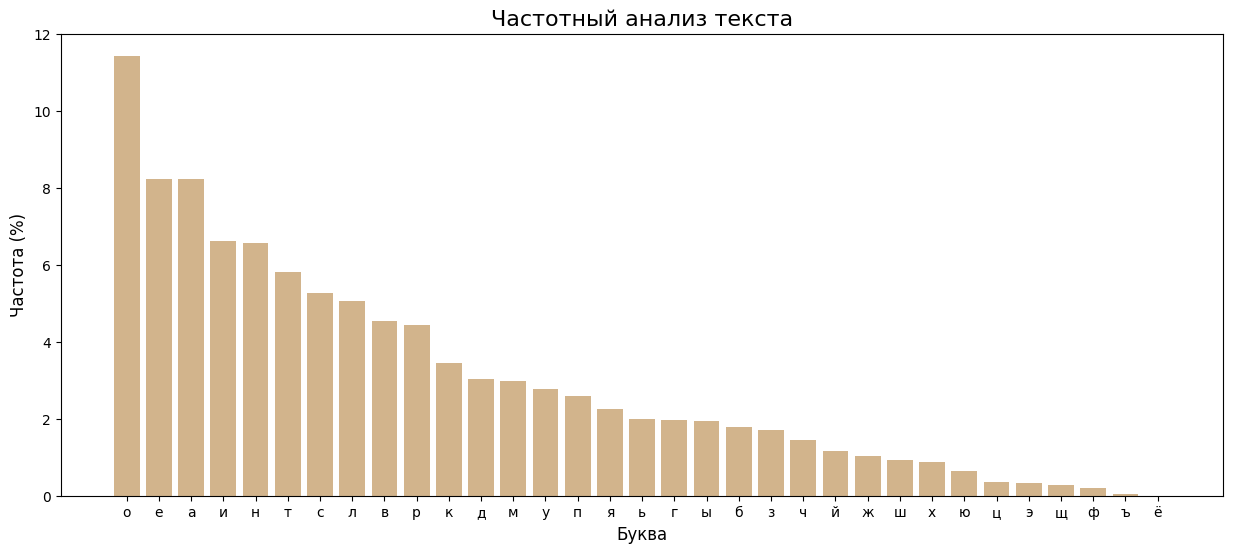

In [ ]:
sorted_items = counts.most_common()
labels = [item[0] for item in sorted_items]
values = [(item[1] / total) * 100 for item in sorted_items]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ текста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Теперь зашифруем первые две тысячи символов этого же текста с помощью ключа "мфыэжщшцлнбюкъярпаьсчтхдгевиозёуй". Я сохранил себе шифртекст в файл cryptotext_test.txt, давайте построим такую же диаграмму 

In [33]:
with open("cryptotext_test.txt") as file:
    text = file.read()
letters = re.findall("[а-яё]", text)

letters_count = Counter(letters)
total_count = sum(letters_count.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")
print(letters_count)
for char, l_count in letters_count.most_common():
    percent = (l_count / total_count) * 100
    print(f"'{char}':    {l_count}     {percent:.3f}%") 

Буква   Кол-во   %
Counter({'щ': 191, 'р': 182, 'м': 178, 'я': 148, 'н': 141, 'ы': 118, 'ь': 103, 'с': 94, 'а': 86, 'к': 80, 'ю': 74, 'ч': 58, 'ъ': 58, 'ж': 58, 'п': 51, 'й': 47, 'л': 46, 'о': 45, 'г': 36, 'з': 33, 'э': 33, 'б': 26, 'е': 25, 'ф': 24, 'ц': 19, 'х': 15, 'у': 12, 'т': 6, 'д': 6, 'в': 4, 'ё': 3})
'щ':    191     9.550%
'р':    182     9.100%
'м':    178     8.900%
'я':    148     7.400%
'н':    141     7.050%
'ы':    118     5.900%
'ь':    103     5.150%
'с':    94     4.700%
'а':    86     4.300%
'к':    80     4.000%
'ю':    74     3.700%
'ч':    58     2.900%
'ъ':    58     2.900%
'ж':    58     2.900%
'п':    51     2.550%
'й':    47     2.350%
'л':    46     2.300%
'о':    45     2.250%
'г':    36     1.800%
'з':    33     1.650%
'э':    33     1.650%
'б':    26     1.300%
'е':    25     1.250%
'ф':    24     1.200%
'ц':    19     0.950%
'х':    15     0.750%
'у':    12     0.600%
'т':    6     0.300%
'д':    6     0.300%
'в':    4     0.200%
'ё':    3     0.150%


Построим график

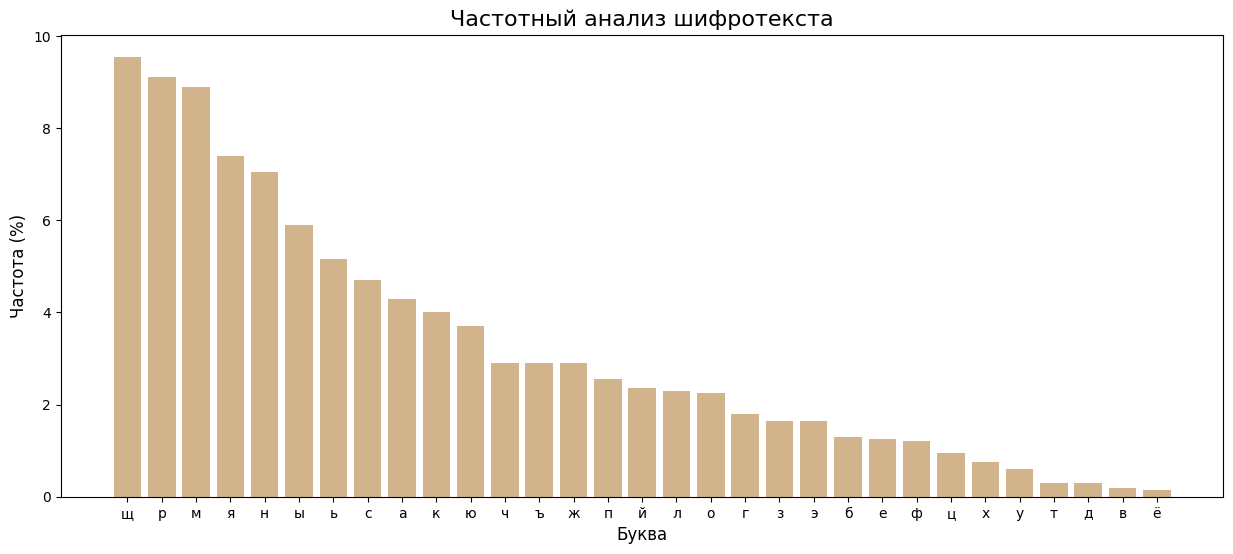

In [37]:
sorted_items_crypto = letters_count.most_common()
labels = [item[0] for item in sorted_items_crypto]
values = [(item[1] / total_count) * 100 for item in sorted_items_crypto]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ шифротекста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()